**In this example, We will compare Linear Regression and Support Vector Regression(Nonlinear)**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

**Loading Dataset**

In [9]:
data=sns.load_dataset("car_crashes")
df=data.copy()
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


**We define independent and dependent variable**

In [0]:
X_train=df[["alcohol"]]
y_train=df["total"]

In [0]:
reg=LinearRegression()
linear_model=reg.fit(X_train,y_train)

**RMSE**

In [162]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

2.132700058579433

**When we plot Linear Regression, we see Linear chart**

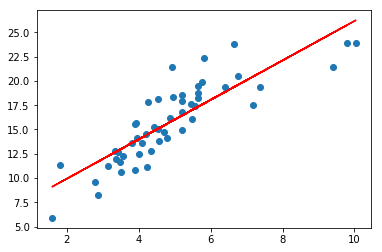

In [163]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear_model.predict(X_train),color="r")

**Let's try SVR(Support Vector Regression)**

**We write "rbf" in SVR function for nonlinear SVR**

In [164]:
model_svr=SVR("rbf").fit(X_train,y_train)
model_svr

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

**For good solution we make MODEL TUNİNG**

In [0]:
c_params={"C":np.arange(0.1,5,0.1)}
model_crossv=GridSearchCV(model_svr,c_params,cv=10).fit(X_train,y_train)

In [166]:
model_crossv.best_params_ #Dictionary Type

{'C': 3.4000000000000004}

In [167]:
model_crossv.best_params_["C"]

3.4000000000000004

In [0]:
model_tuned=SVR("rbf",C=model_crossv.best_params_["C"]).fit(X_train,y_train)

**RMSE**

In [169]:
np.sqrt(mean_squared_error(y_train,model_tuned.predict(X_train)))

1.8796416833805278

**And we plot SVR, more flexible than Linear Regression**

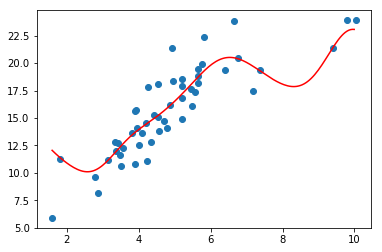

In [170]:
X_train=df["alcohol"]
x_point = np.arange(min(X_train), max(X_train), 0.05)
x_point = x_point.reshape((len(x_point), 1))
plt.scatter(X_train, y_train)
plt.plot(x_point, model_tuned.predict(x_point), color = 'red')